Now. Let's look at how each parameter affects the step response of the system when compared against the step input test data. This is for water at 600 rpm with 5% step input power.

FLUID DATA FOR step1_10p.csv REFERENCED AT  20-Jun-24 14:35:50:452
Rj, Rfj, Rf: [2.21, 1.22, 0.12]
Cc, Cf: [6021, 1234]
FLUID DATA FOR step1_50p.csv REFERENCED AT  20-Jun-24 19:01:30:089
Rj, Rfj, Rf: [2.21, 1.22, 0.12]
Cc, Cf: [6021, 1234]
FLUID DATA FOR step_5p.csv REFERENCED AT  19-Jun-24 15:45:47:206
uh oh... something went horribly wrong! at dates (datetime.datetime(2024, 6, 19, 15, 55, 20, 609), datetime.datetime(2024, 6, 19, 15, 51, 27, 233))
uh oh... something went horribly wrong! at dates (datetime.datetime(2024, 6, 19, 23, 28, 25, 202), datetime.datetime(2024, 6, 19, 23, 19, 55, 168))
Rj, Rfj, Rf: [2.21, 1.22, 0.12]
Cc, Cf: [6021, 1234]
FLUID DATA FOR step_75p.csv REFERENCED AT  24-Jun-24 15:40:50:513
Rj, Rfj, Rf: [2.21, 1.22, 0.12]
Cc, Cf: [6021, 1234]
FLUID DATA FOR glycerol_10p.csv REFERENCED AT  25-Jun-24 13:41:09:965
Rj, Rfj, Rf: [2.21, 1.22, 0.12]
Cc, Cf: [6021, 1234]


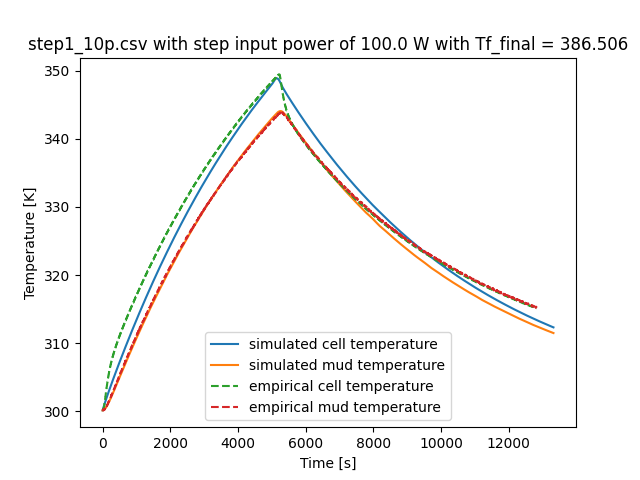

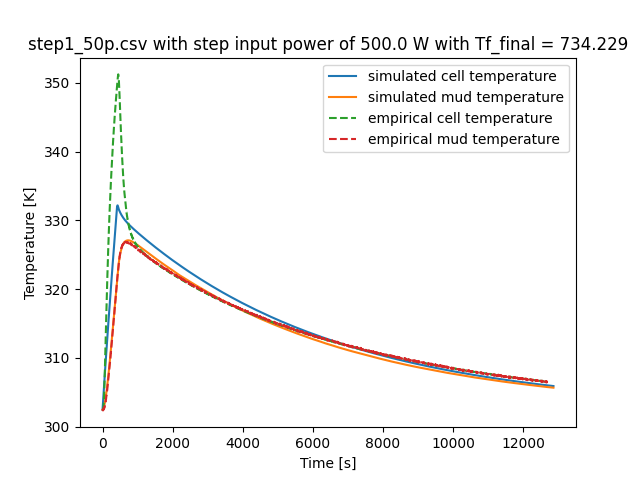

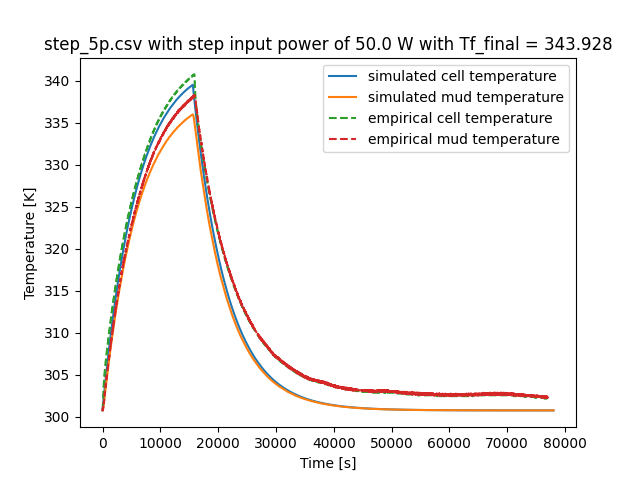

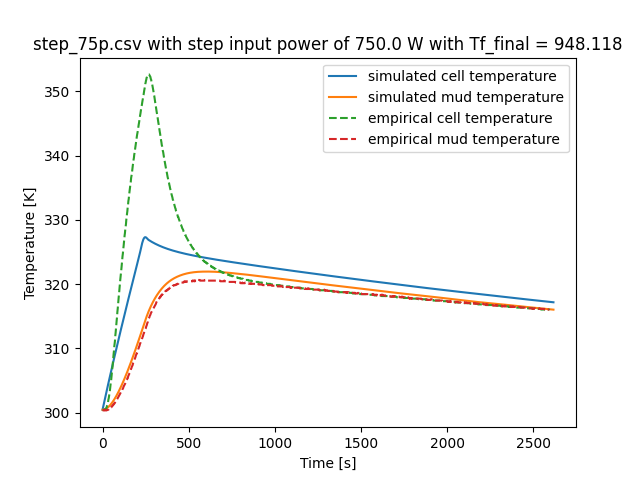

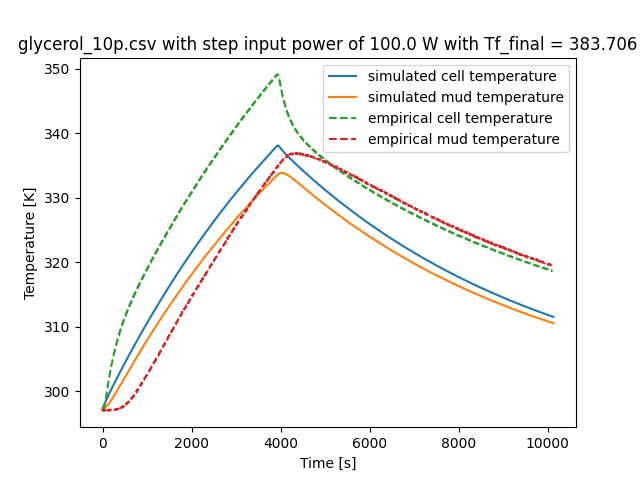

In [72]:
%matplotlib widget

from dru_thermal_model import *
from data_visualizer import *

# read in test data
for filename in ["step1_10p.csv", "step1_50p.csv", "step_5p.csv", "step_75p.csv", "glycerol_10p.csv"]:
    step_power = float(filename.split('p')[-2].split('_')[-1])/100
    my_fluid = MysteriousMud(filename)
    my_fluid.importRawData(filename, heaterHeader=True)

    model = ThermalModel(my_fluid)

    # self.thermal_resistances = [Rj,Rfj,Rf]
    # self.thermal_capacitances = [Cc, Cf]

    model.thermal_resistances = [2.210, 1.22, .12] # Rf
    model.thermal_capacitances = [6021, 1234]
    #model.Tambient = 302.5

    x0 = np.array([model.Tambient, model.Tambient])
    temp_cell, temp_mud = model.stepResponse(x0, powerPercentage = step_power)
    model.plot(bigfig=False)

Let's look at how the thermal resistances and capacitances affect the step response.

Rj, Rfj, Rf: [1.1, 3, 0.2]
Cc, Cf: [500.0, 1234]
Rj, Rfj, Rf: [1.1, 3, 0.2]
Cc, Cf: [2875.0, 1234]
Rj, Rfj, Rf: [1.1, 3, 0.2]
Cc, Cf: [5250.0, 1234]
Rj, Rfj, Rf: [1.1, 3, 0.2]
Cc, Cf: [7625.0, 1234]
Rj, Rfj, Rf: [1.1, 3, 0.2]
Cc, Cf: [10000.0, 1234]


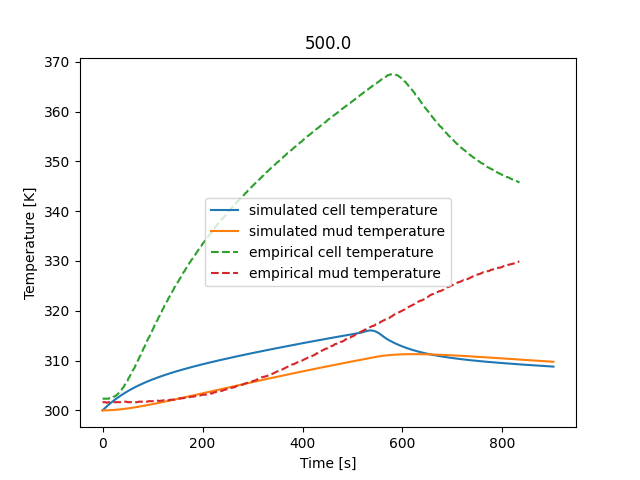

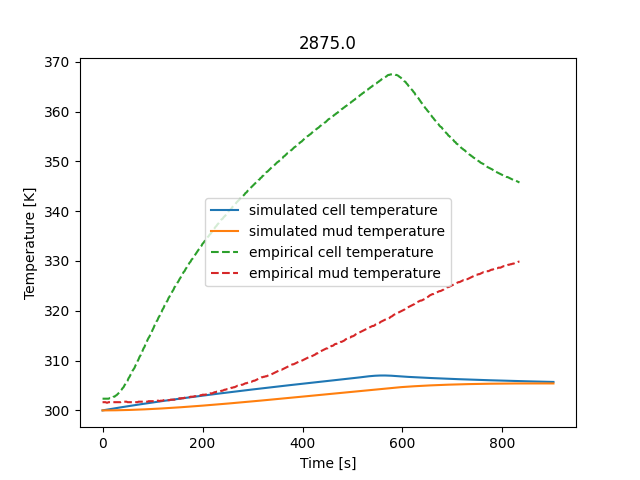

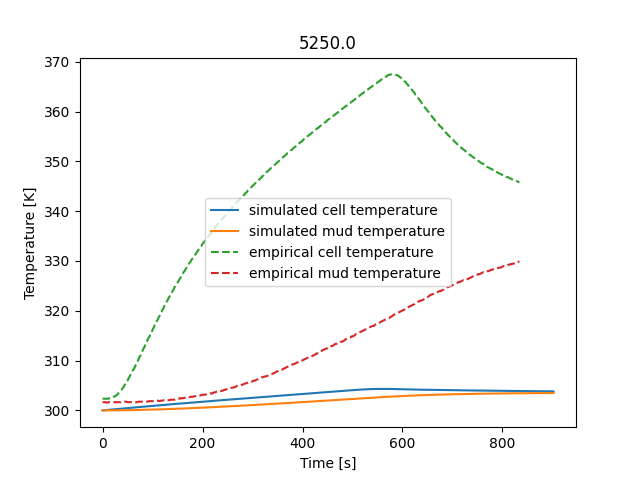

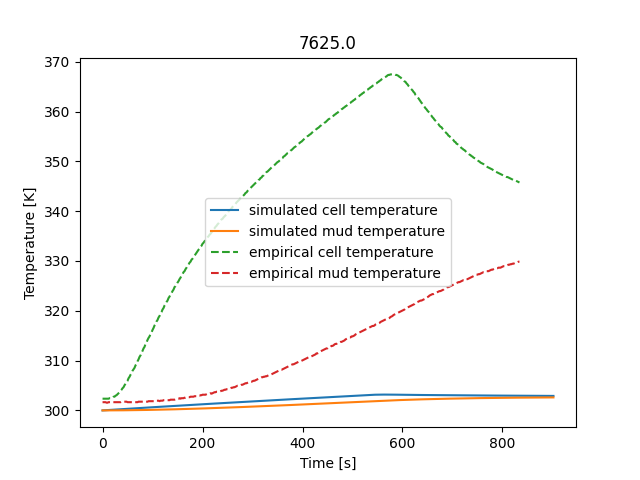

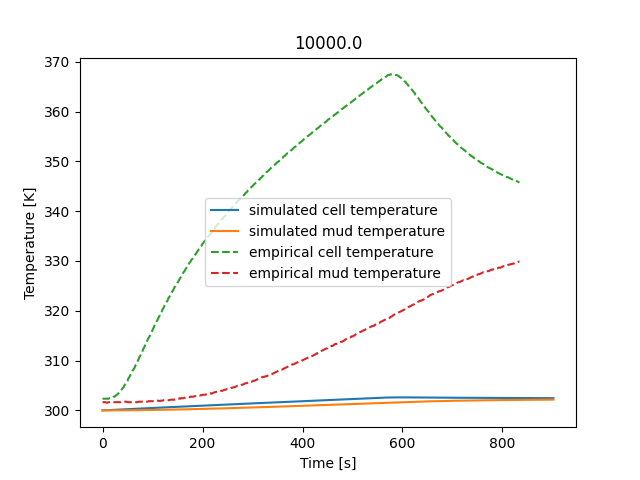

In [2]:
for cc in np.linspace(500,10000,5):
    model = ThermalModel(my_fluid)
    model.thermal_resistances = [1.10, 3, .2]
    model.thermal_capacitances = [cc, 1234]
    x0 = np.array([model.Tambient, model.Tambient])
    temp_cell, temp_mud = model.stepResponse(x0, powerPercentage= 0.05)
    model.plot(bigfig= False)
    plt.title(cc)

Rj, Rfj, Rf: [1.1, 3, 0.2]
Cc, Cf: [5000, 500.0]
Rj, Rfj, Rf: [1.1, 3, 0.2]
Cc, Cf: [5000, 2875.0]
Rj, Rfj, Rf: [1.1, 3, 0.2]
Cc, Cf: [5000, 5250.0]
Rj, Rfj, Rf: [1.1, 3, 0.2]
Cc, Cf: [5000, 7625.0]
Rj, Rfj, Rf: [1.1, 3, 0.2]
Cc, Cf: [5000, 10000.0]


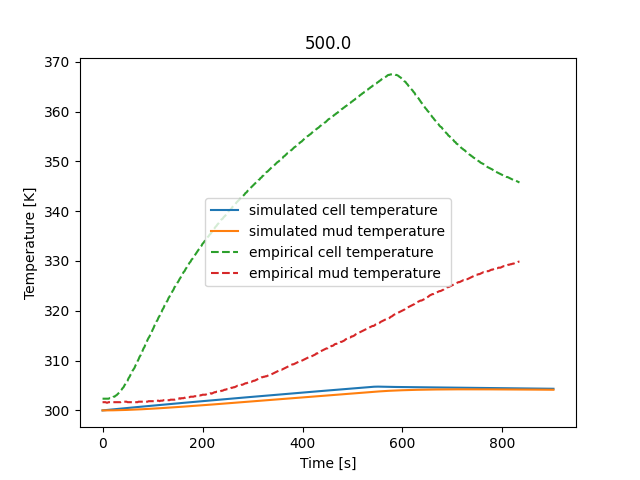

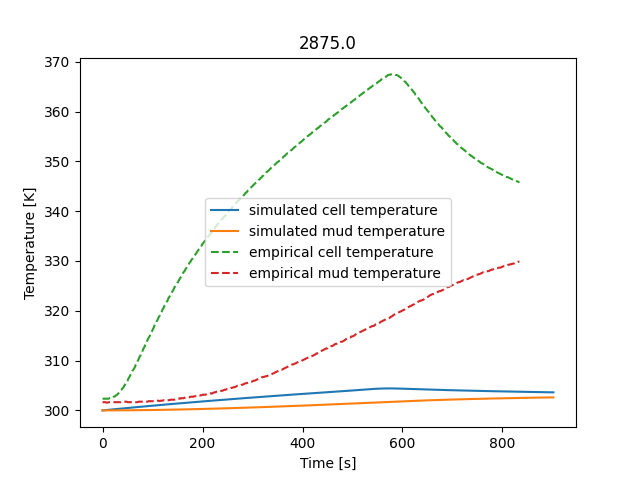

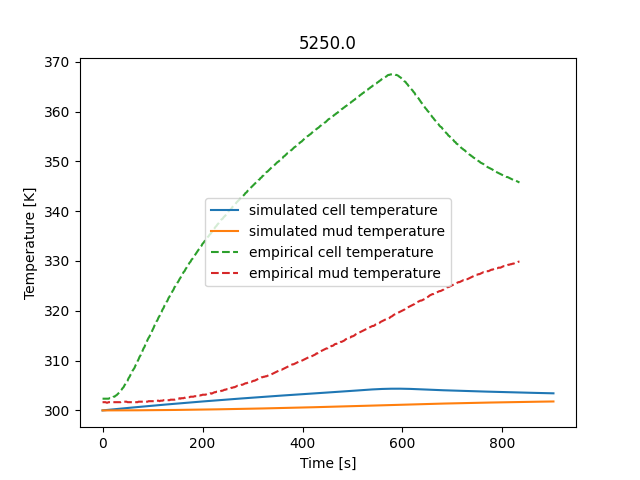

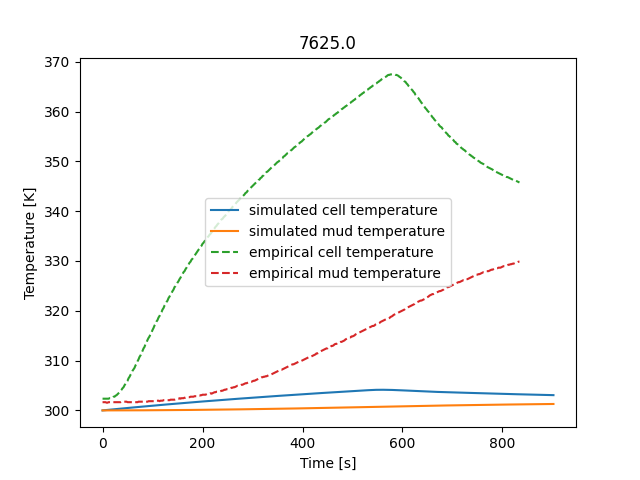

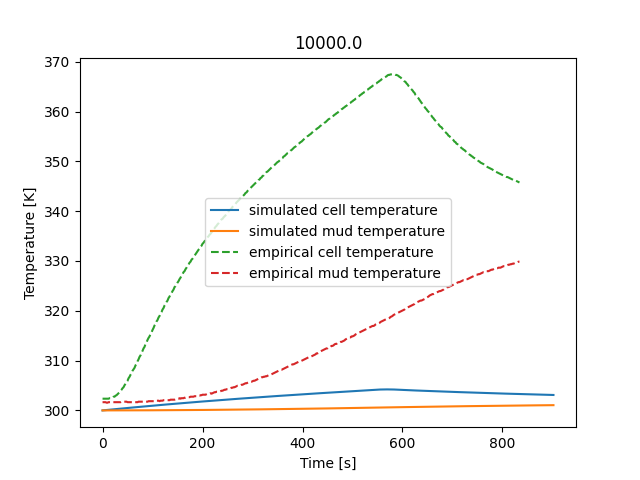

In [3]:
for cc in np.linspace(500,10000,5):
    model = ThermalModel(my_fluid)
    model.thermal_resistances = [1.10, 3, .2]
    model.thermal_capacitances = [5000, cc]
    x0 = np.array([model.Tambient, model.Tambient])
    temp_cell, temp_mud = model.stepResponse(x0, powerPercentage= 0.05)
    model.plot(bigfig= False)
    plt.title(cc)

Rj, Rfj, Rf: [0.01, 3, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [0.5644444444444445, 3, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.118888888888889, 3, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.6733333333333336, 3, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [2.227777777777778, 3, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [2.7822222222222224, 3, 0.2]
Cc, Cf: [5000, 1234]


c:\Users\H307393\OneDrive - Halliburton\Desktop\code_workspace\dru_thermal_model.py:150: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Rj, Rfj, Rf: [3.336666666666667, 3, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [3.8911111111111114, 3, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [4.445555555555556, 3, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [5.0, 3, 0.2]
Cc, Cf: [5000, 1234]


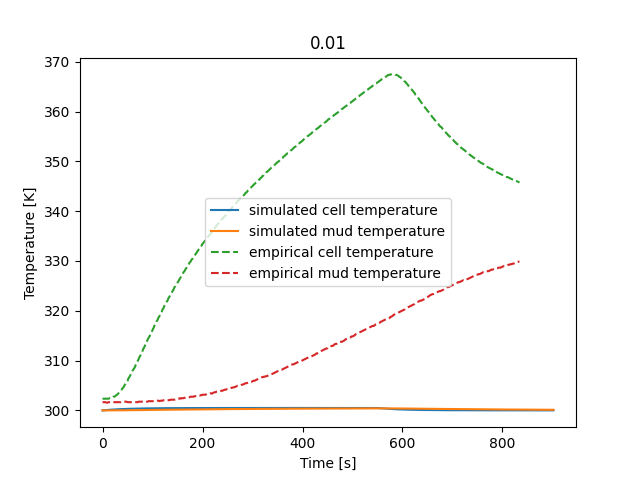

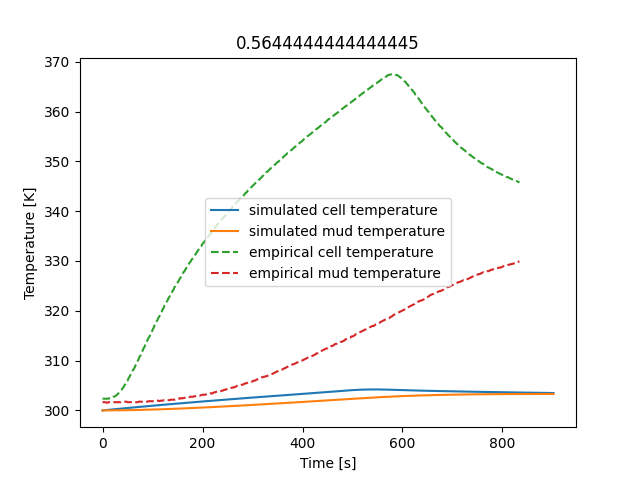

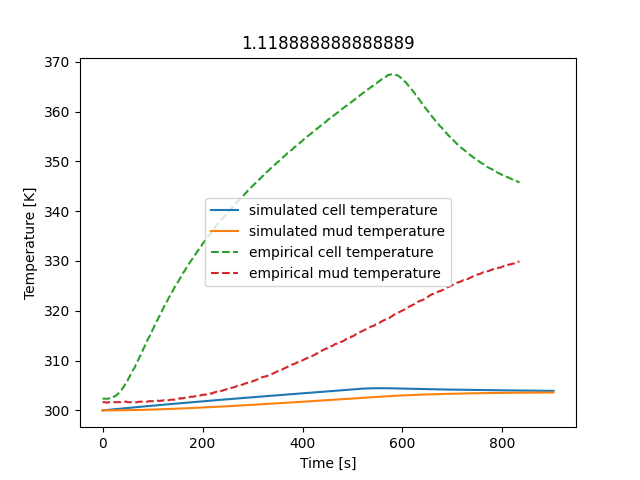

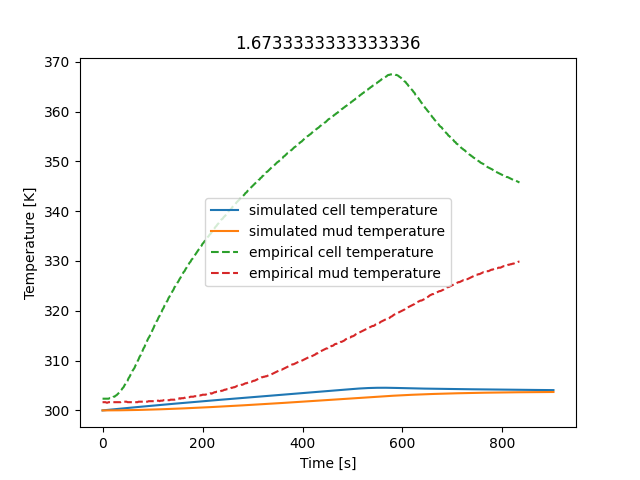

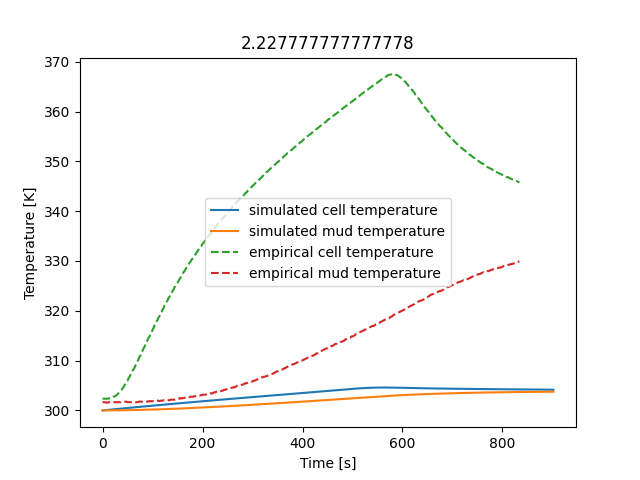

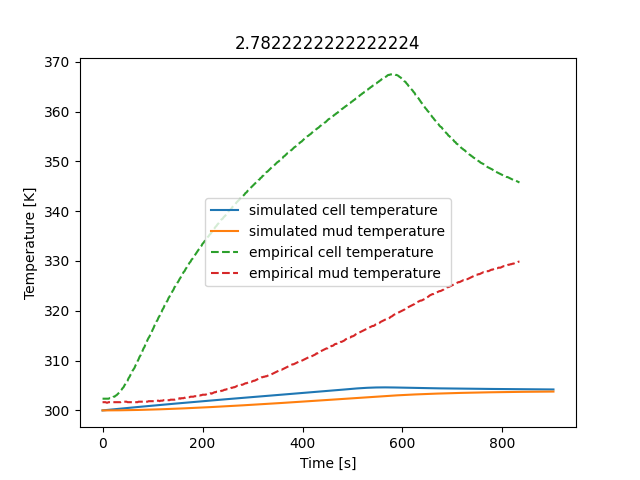

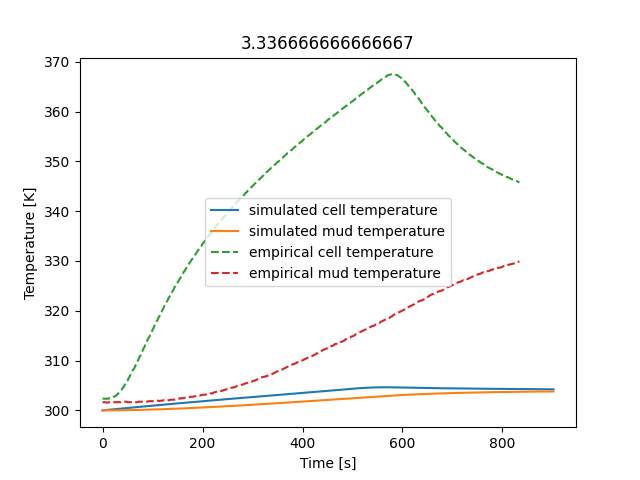

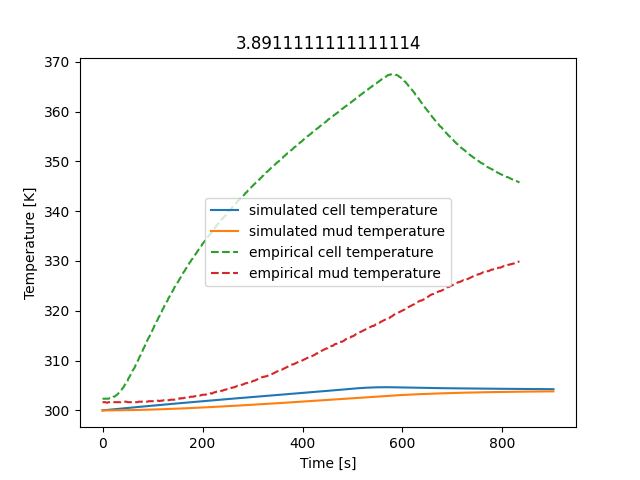

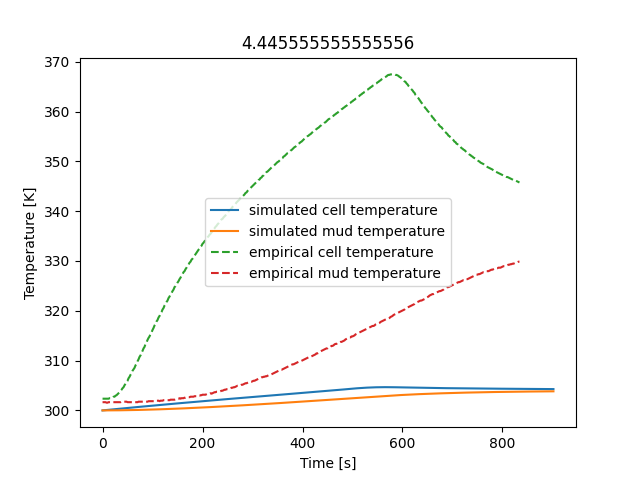

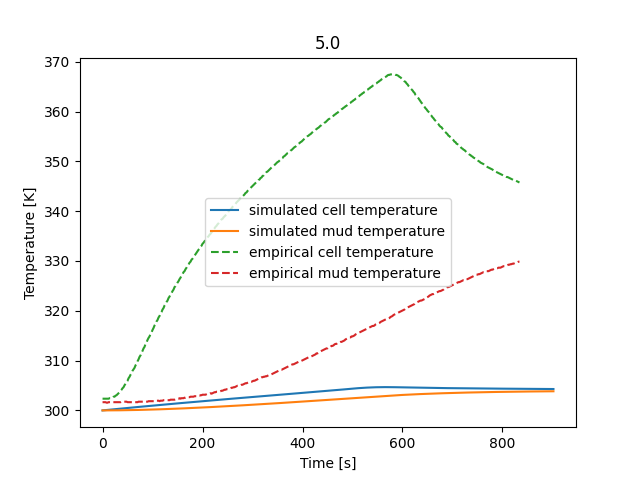

In [4]:
for r in np.linspace(.01,5,10):
    model = ThermalModel(my_fluid)
    model.thermal_resistances = [r, 3, .2]
    model.thermal_capacitances = [5000, 1234]
    x0 = np.array([model.Tambient, model.Tambient])
    temp_cell, temp_mud = model.stepResponse(x0, powerPercentage= 0.05)
    model.plot(bigfig= False)
    plt.title(r)

Rj, Rfj, Rf: [1.1, 0.01, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 0.5644444444444445, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 1.118888888888889, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 1.6733333333333336, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 2.227777777777778, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 2.7822222222222224, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 3.336666666666667, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 3.8911111111111114, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 4.445555555555556, 0.2]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 5.0, 0.2]
Cc, Cf: [5000, 1234]


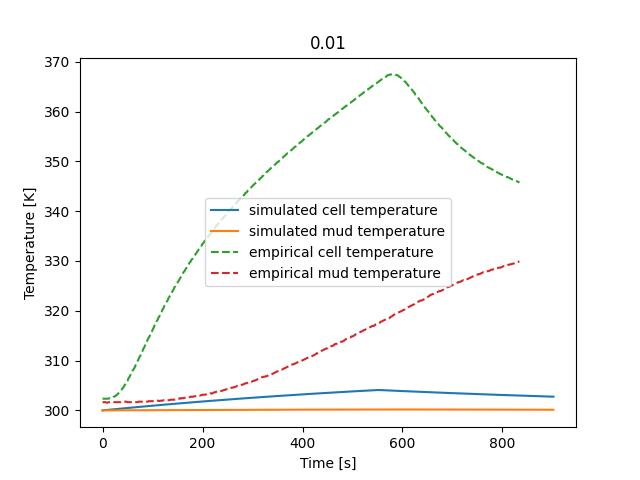

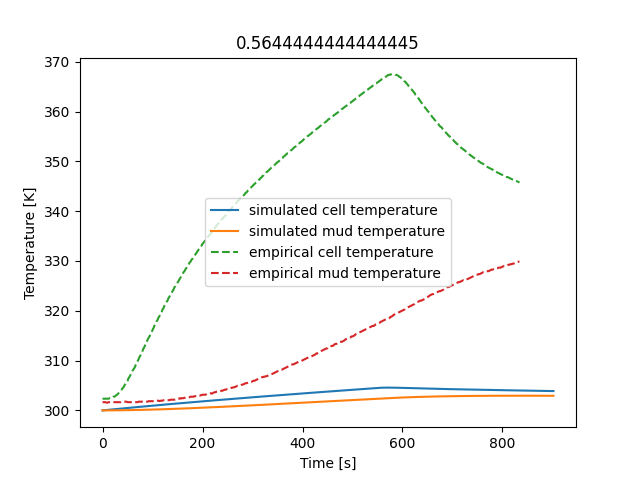

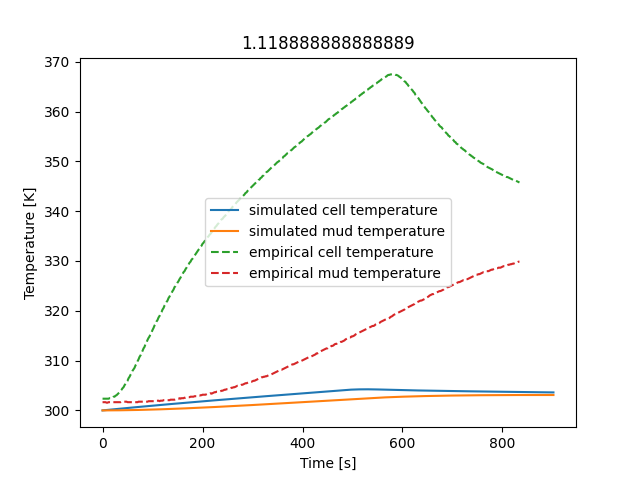

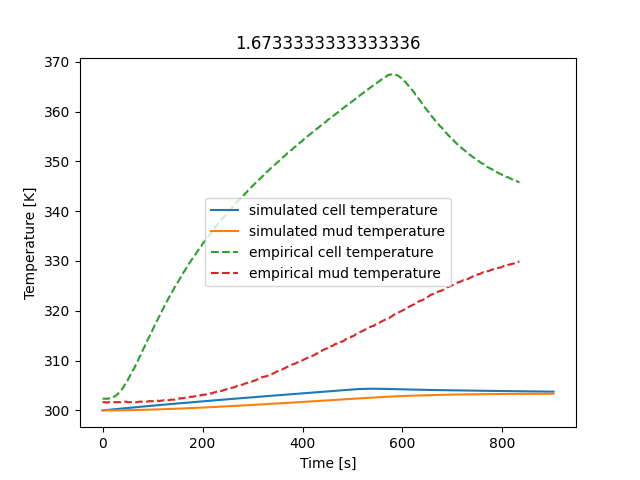

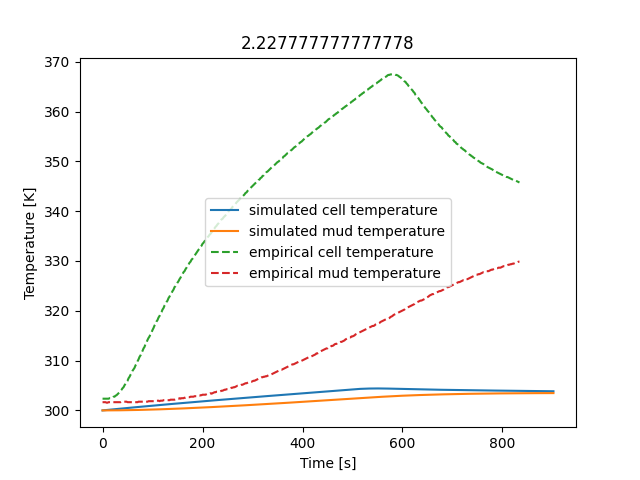

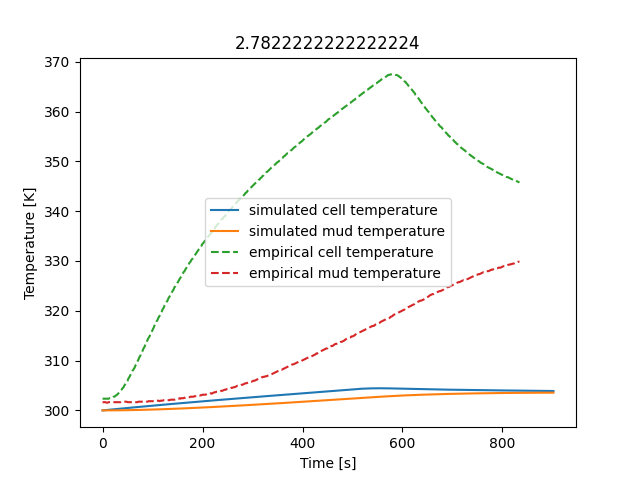

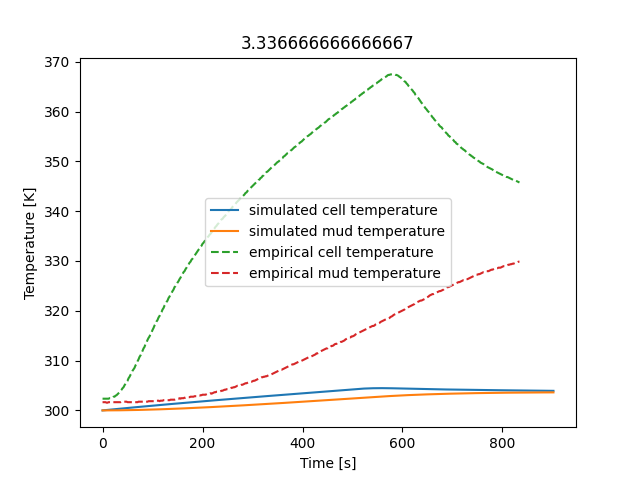

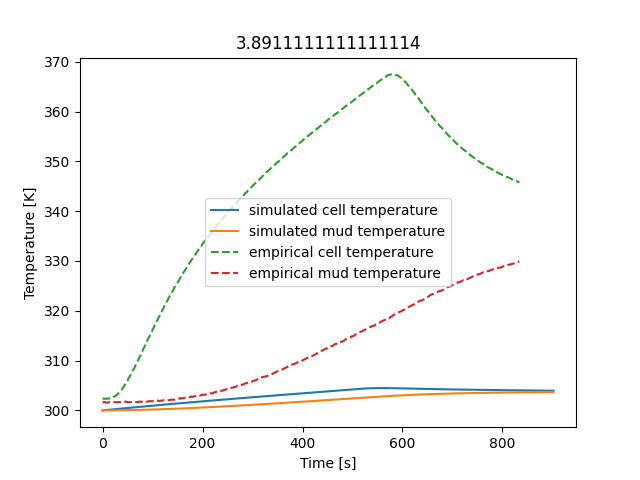

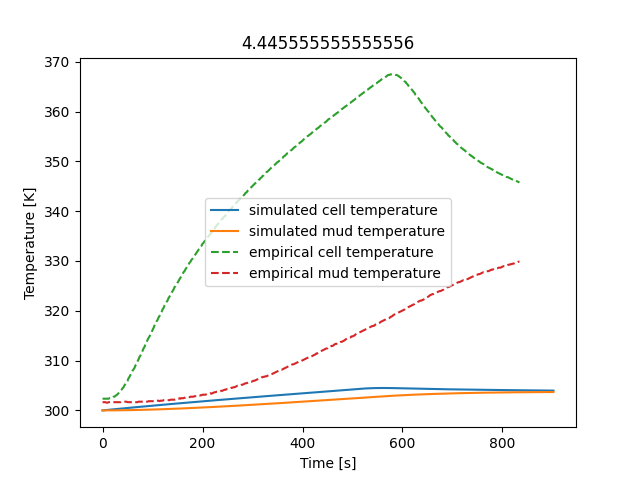

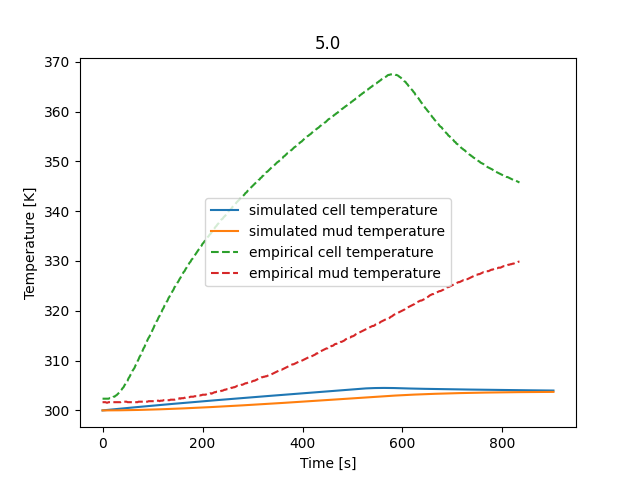

In [5]:
for r in np.linspace(.01,5,10):
    model = ThermalModel(my_fluid)
    model.thermal_resistances = [1.1, r, .2]
    model.thermal_capacitances = [5000, 1234]
    x0 = np.array([model.Tambient, model.Tambient])
    temp_cell, temp_mud = model.stepResponse(x0, powerPercentage= 0.05)
    model.plot(bigfig= False)
    plt.title(r)

Rj, Rfj, Rf: [1.1, 3, 0.01]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 3, 0.5644444444444445]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 3, 1.118888888888889]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 3, 1.6733333333333336]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 3, 2.227777777777778]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 3, 2.7822222222222224]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 3, 3.336666666666667]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 3, 3.8911111111111114]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 3, 4.445555555555556]
Cc, Cf: [5000, 1234]
Rj, Rfj, Rf: [1.1, 3, 5.0]
Cc, Cf: [5000, 1234]


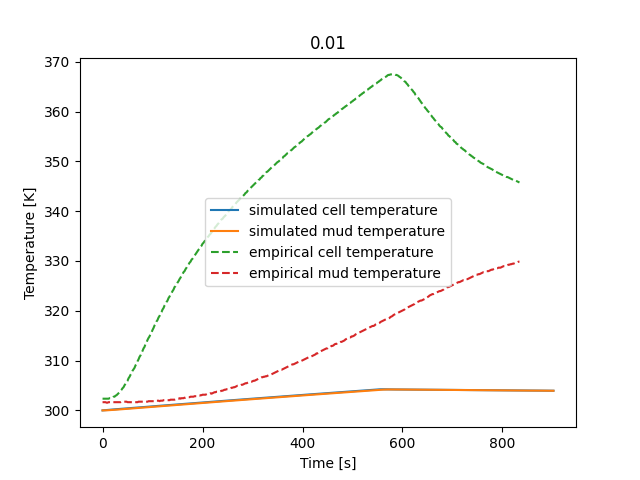

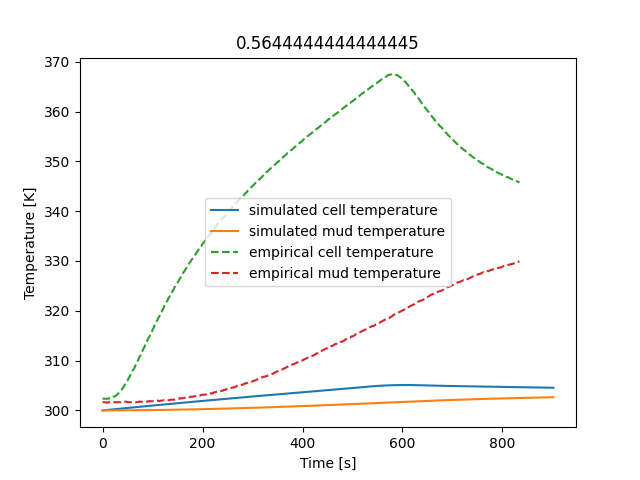

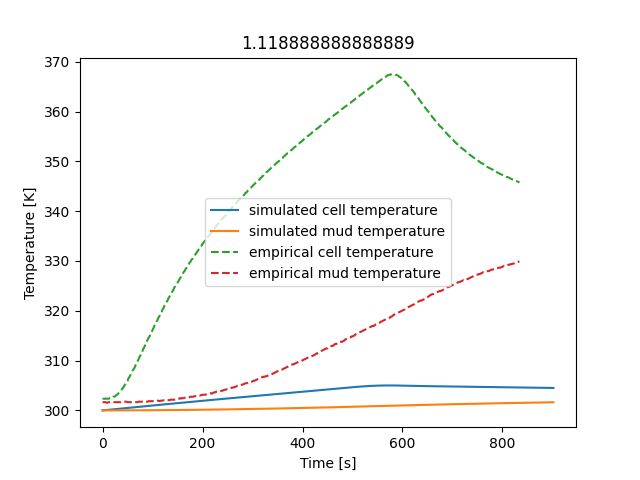

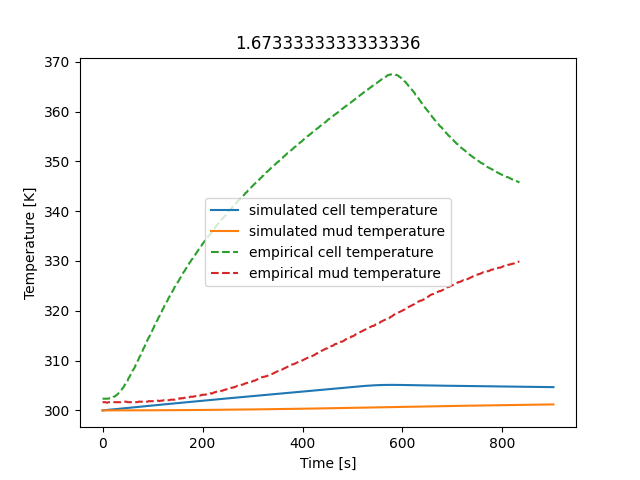

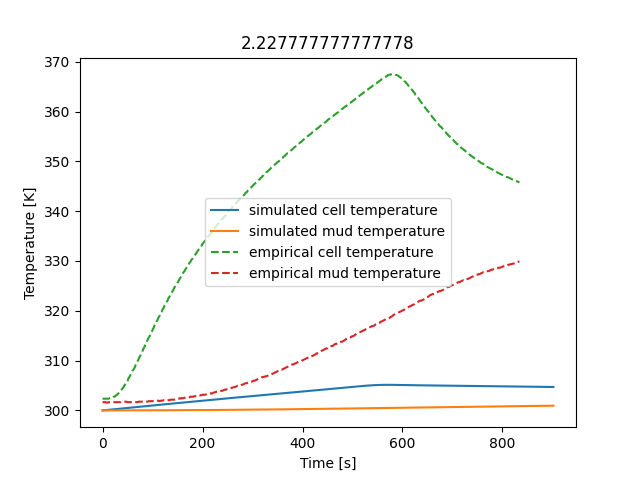

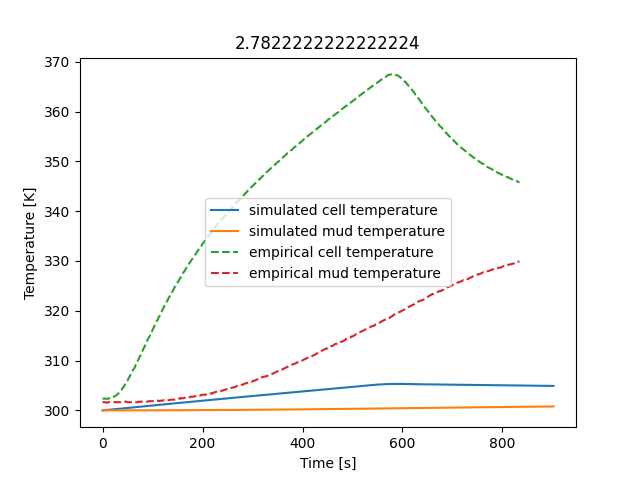

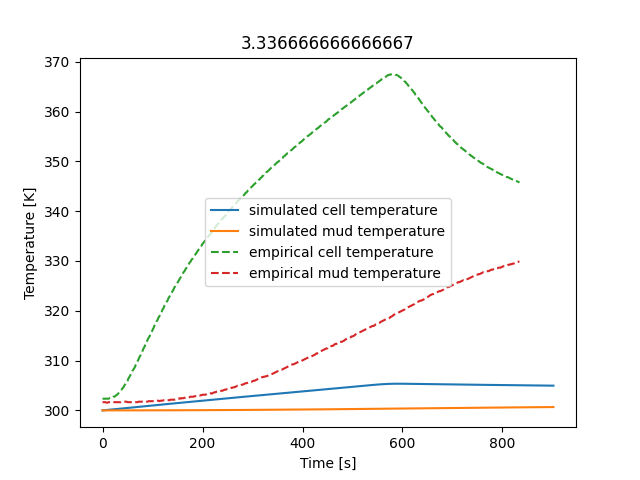

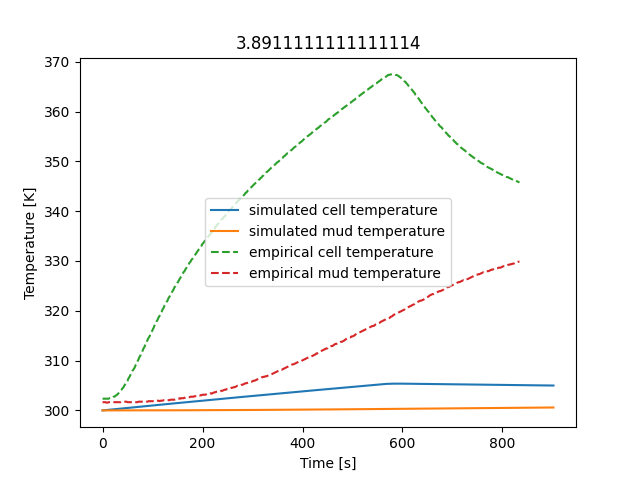

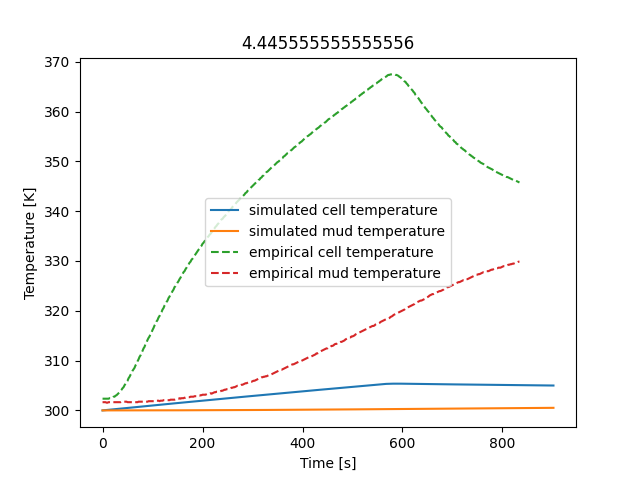

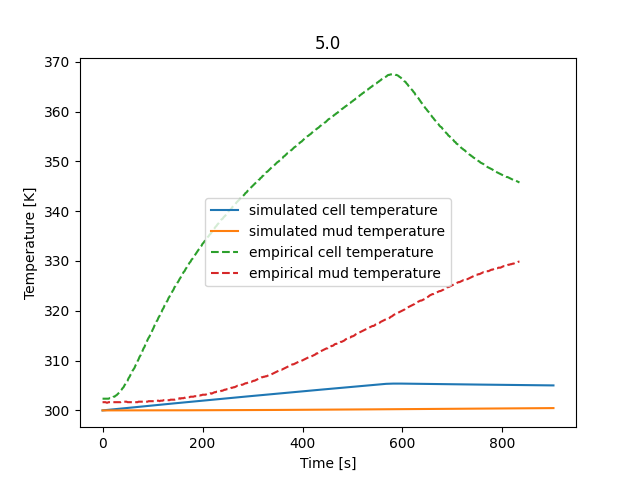

In [6]:
for r in np.linspace(.01,5,10):
    model = ThermalModel(my_fluid)
    model.thermal_resistances = [1.1, 3, r]
    model.thermal_capacitances = [5000, 1234]
    x0 = np.array([model.Tambient, model.Tambient])
    temp_cell, temp_mud = model.stepResponse(x0, powerPercentage= 0.05)
    model.plot(bigfig= False)
    plt.title(r)

Trying to optimize the parameters around the fluid behavior

FLUID DATA FOR glycerol_10p.csv REFERENCED AT  25-Jun-24 13:41:09:965
Rj, Rfj, Rf: [200.21, 1.122, 0.235]
Cc, Cf: [6000, 825]


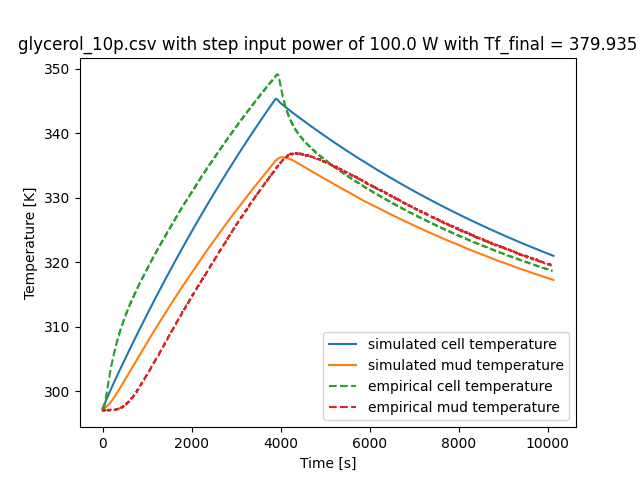

In [68]:
%matplotlib widget

from dru_thermal_model import *
from data_visualizer import *

# read in test data
for filename in ["glycerol_10p.csv"]:
    step_power = float(filename.split('p')[-2].split('_')[-1])/100
    my_fluid = MysteriousMud(filename)
    my_fluid.importRawData(filename, heaterHeader=True)

    model = ThermalModel(my_fluid)

    # self.thermal_resistances = [Rj,Rfj,Rf]
    # self.thermal_capacitances = [Cc, Cf]

    model.thermal_resistances = [200.210, 1.122, .235] # Rf
    model.thermal_capacitances = [6000, 825]
    #model.Tambient = 302.5

    x0 = np.array([1,1]) * model.Tambient
    temp_cell, temp_mud = model.stepResponse(x0, powerPercentage = step_power)
    model.plot(bigfig=False)

Let's test on a 3rd order model.

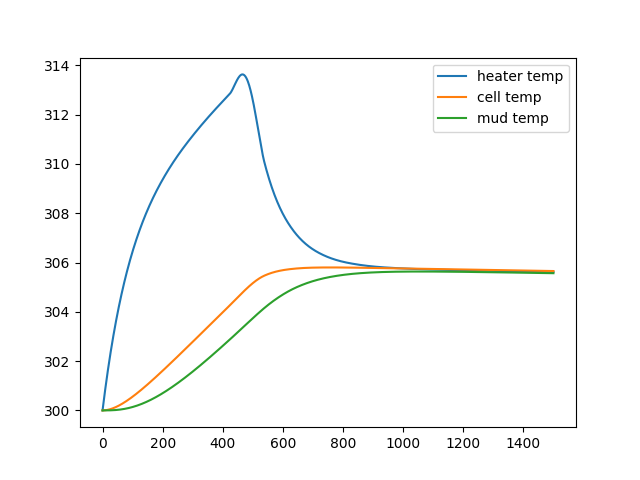

In [5]:
%matplotlib widget

from dru_thermal_model import *
from data_visualizer import *

Ch = 1000 #cap_ss * density_ss * d_heat**2 /4 * np.pi * l_heat * n_heaters
Rc = .1
Rj = 10
Cc = 6000
Cf = 1200
Rf = 0.1
Rfj = 5


Tn = 1500


def ss_model(t,x): # x = [Th-Tamb, Tc-Tamb; Tf-Tamb]

        A = np.array([[-1/Ch * (1/Rc + 1/Rj), 1/(Rc*Ch), 0],
                [1/(Rc*Cc), -1/Cc * (1/Rc + 1/Rf), 1/(Rf*Cc)],
                [0, 1/(Rf*Cf), -1/Cf * (1/Rfj + 1/Rf)]])
        B = np.array([1/Ch, 0, 0]).transpose() 
        C = np.array([0, 0, 1])

        if t > 0 and t < Tn/3:
            p = 100
        else:
            p = 0
        
        d = 0
        if p > 0:
            p = min(abs(p),1000)
        else:
            p = 0

        xdot = A @ x + B*p + d

        #print(x.shape, xdot)
        return xdot

Tambient = 300
tvec = np.linspace(0,Tn,1000)
X0 = np.zeros(3)
sol = solve_ivp(ss_model,(tvec[0],tvec[-1]), X0, t_eval=tvec)

yout = sol.y
temp_mud = yout[2,:] + Tambient
temp_cell = yout[1,:] + Tambient
temp_heater = yout[0,:] + Tambient

plt.figure()
plt.plot(tvec,temp_heater, label = "heater temp")
plt.plot(tvec,temp_cell, label = "cell temp")
plt.plot(tvec,temp_mud, label = "mud temp")

plt.legend()